# Random Forest - Solutions

In this tutorial we will using data on House Sales in King County, United States of America data. We will try to predict the house price using Random Forest Regression and classify the prices using Random Forest Classifier.

## Packages

In [1]:
InstallPackages = False
if InstallPackages:
    !pip install pandas
    !pip install numpy
    !pip install scikit-learn
    !pip install seaborn
    !pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

## Seed

In [5]:
seed = 42

## Read the Data
Read in the 09.1 house prices.csv file and set it to a data frame called df.

In [6]:
df = pd.read_csv('Data/09.1 house prices.csv')

Use info on df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Check the head of ad_data

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
#drop strings
df = df.drop(['id', 'date'], axis=1)

## Exercise 1 - Conduct the Random Forest *Regression*


In [10]:
#split the data into test and train parts
x_train,x_test,y_train,y_test = train_test_split(df.drop('price', axis=1),np.asarray(df['price']))

In [11]:
print(x_train.shape)

(16209, 18)


In [12]:
print(y_train.shape)

(16209,)


In [13]:
print(x_test.shape)

(5404, 18)


In [14]:
print(y_test.shape)

(5404,)


In [15]:
# define the model
model = RandomForestRegressor()

In [16]:
# fit the model on the whole dataset
model.fit(x_train, y_train)

RandomForestRegressor()

In [17]:
#get the feature importance for each feature
model.feature_importances_

array([0.00289598, 0.0089088 , 0.25991086, 0.01401369, 0.00199119,
       0.03182103, 0.01057894, 0.00276096, 0.32976103, 0.0186151 ,
       0.00600813, 0.02803756, 0.00214578, 0.01565519, 0.15848227,
       0.06240574, 0.03157403, 0.01443372])

In [18]:
#predict y for the test set
model.predict(x_test)

array([ 271582.05      , 1105055.5       ,  453590.        , ...,
        441867.95      ,  430191.2       ,  544718.31666667])

In [19]:
#r^2 squared fit of the model
r2_score(y_test, model.predict(x_test))

0.8926803942682732

## Exercise 2 - Conduct the Random Forest *Classifier*

**Note:** You may classify the houses below the median and above or equal to the median price


In [20]:
#define the price category
df['price_category'] = df['price'].apply(lambda x: 'above_median' if x > df['price'].median() else 'below_median')

In [21]:
#split the data into test and train parts
x_train,x_test,y_train,y_test = train_test_split(df.drop(['price','price_category'], axis=1),np.asarray(df['price_category']))

In [22]:
print(x_train.shape)

(16209, 18)


In [23]:
print(y_train.shape)

(16209,)


In [24]:
print(x_test.shape)

(5404, 18)


In [25]:
print(y_test.shape)

(5404,)


In [26]:
# define the model
model = RandomForestClassifier()

In [27]:
# fit the model on the whole dataset
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
#get the feature importance for each feature
model.feature_importances_

array([0.01185513, 0.02926876, 0.1213379 , 0.04055616, 0.01077636,
       0.00155187, 0.0097584 , 0.00900776, 0.11003601, 0.06543571,
       0.02637966, 0.04281896, 0.00284248, 0.04424988, 0.29161424,
       0.05250415, 0.08233854, 0.04766804])

In [29]:
#predict y for the test set
predictions = model.predict(x_test)

In [30]:
#return the fraction of correctly classified samples of the model
print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy of model is 90.85862324204294%


In [31]:
#Build the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

In [32]:
#display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

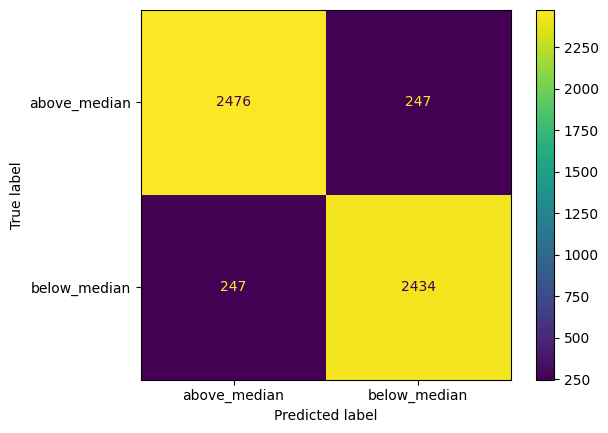

In [33]:
#plot the confusion matrix
disp.plot()

## Exercise 3 - Conduct the Random Forest Classifier using Cross Validation

**Note:** You may use the classification of the houses below the median and above or equal to the median price

**Note:** You may use cross validation.

**Note:** You may print the accuracy as well as the standard deviation of the model

In [34]:
# define the model
model = RandomForestClassifier()

In [35]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
n_scores = cross_val_score(model, df.drop(['price','price_category'], axis=1), np.asarray(df['price_category']), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [36]:
# report fit
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.910 (0.007)


## Exercise 4 - Show how the Random Forest Classifier using Cross Validation accuracy varies in **the number of trees**

**Note:** You may write a function to get a list of models to evaluate.

**Note:** You may write a function to evaluate a given model using cross-validation.

**Note:** You may print the accuracy over the number of trees.

In [37]:
def get_models(n_trees):
    
    """
    This funstion is used to get a list of models to evaluate.  
    
    """
    
    models = dict()
     
    # define number of trees to consider
    #n_trees = [10, 50, 100, 500, 1000]
        
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
            
    return models

In [38]:
def evaluate_model(model, X, y):
    
    """
    This funstion is used to evaluate a given model using cross-validation. 
    
    """
        
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 
    return scores

Now it's time to evaluate the model.

In [39]:
# get the models to evaluate
models = get_models(n_trees = [2, 10, 50, 100,200])

In [40]:
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    
    # evaluate the model
    scores = evaluate_model(model, x_train, y_train)
    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>2 0.851 (0.009)
>10 0.898 (0.007)
>50 0.908 (0.006)
>100 0.909 (0.006)
>200 0.910 (0.006)


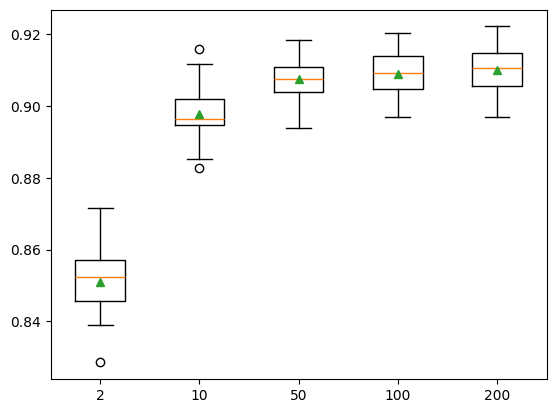

In [42]:
# plot model performance for comparison
plt.boxplot(results, tick_labels=names, showmeans=True)
plt.show()